In [1]:
#Set up python virtual enviroment for EmoPy
!pip install graphviz
!sudo pip install virtualenv
!sudo apt-get install python3.6-venv
!python3.6 -m venv venv

     |████████████████████████████████| 8.0MB 4.9MB/s 
     |████████████████████████████████| 573kB 57.6MB/s 
  Created wheel for distlib: filename=distlib-0.3.0-cp36-none-any.whl size=340429 sha256=2a6a0722c9cdc37bbe5a1b795f7eb89d0fc3d467d020a979c9075bc343cbb65f
  Stored in directory: /root/.cache/pip/wheels/6e/e8/db/c73dae4867666e89ba3cfbc4b5c092446f0e584eda6f409cbb
Successfully built distlib
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  python-pip-whl
The following NEW packages will be installed:
  python-pip-whl python3.6-venv
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,659 kB of archives.
After this operation, 1,889 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-upd

In [2]:
#Import EmoPy module and github project
!pip install EmoPy
!git clone https://github.com/thoughtworksarts/EmoPy.git

     |████████████████████████████████| 15.7MB 201kB/s 
     |████████████████████████████████| 12.2MB 50.2MB/s 
     |████████████████████████████████| 133kB 77.2MB/s 
  Created wheel for lasagne: filename=Lasagne-0.1-cp36-none-any.whl size=79275 sha256=c3f0b1f6b94f0b678e436ad410a730809c8a63a661b5e850229ba0a5cf6aadf9
  Stored in directory: /root/.cache/pip/wheels/a5/8e/31/b4cae7e5507f8582e77d7f5cf2815be8820ccacfa0519ca60c
  Created wheel for scikit-neuralnetwork: filename=scikit_neuralnetwork-0.7-cp36-none-any.whl size=41700 sha256=dace27f4e2369b99f72424b9035236dbc52ce26546d684f39d6445f7a76d20f6
  Stored in directory: /root/.cache/pip/wheels/7a/2c/db/ad3c876767bfdaf955ede9b7c0315a99abb12c0bdd2a469eff
Successfully built lasagne scikit-neuralnetwork
ERROR: tensorflow 1.15.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.1.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has 

Cloning into 'EmoPy'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 2997 (delta 20), reused 19 (delta 6), pack-reused 2953
Receiving objects: 100% (2997/2997), 153.75 MiB | 31.98 MiB/s, done.
Resolving deltas: 100% (1295/1295), done.


In [3]:
#Change the directory to the imported EmoPy github
cd /content/EmoPy/

/content/EmoPy


In [4]:
#Run the EmoPy setup
!python3 setup.py build
!python3 setup.py install
!python3 setup.py clean
#Run installations for compatable versions of python modules for
# EmoPy to run with no errors
!pip install Keras==2.2.4
!pip install scipy==1.1.0

running build
running build_py
creating build
creating build/lib
creating build/lib/EmoPy
copying EmoPy/__init__.py -> build/lib/EmoPy
creating build/lib/EmoPy/tests
copying EmoPy/tests/run_all.py -> build/lib/EmoPy/tests
copying EmoPy/tests/__init__.py -> build/lib/EmoPy/tests
creating build/lib/EmoPy/src
copying EmoPy/src/directory_data_loader.py -> build/lib/EmoPy/src
copying EmoPy/src/callback.py -> build/lib/EmoPy/src
copying EmoPy/src/dataset.py -> build/lib/EmoPy/src
copying EmoPy/src/data_generator.py -> build/lib/EmoPy/src
copying EmoPy/src/data_loader.py -> build/lib/EmoPy/src
copying EmoPy/src/csv_data_loader.py -> build/lib/EmoPy/src
copying EmoPy/src/neuralnets.py -> build/lib/EmoPy/src
copying EmoPy/src/fermodel.py -> build/lib/EmoPy/src
copying EmoPy/src/__init__.py -> build/lib/EmoPy/src
creating build/lib/EmoPy/library
copying EmoPy/library/image.py -> build/lib/EmoPy/library
copying EmoPy/library/__init__.py -> build/lib/EmoPy/library
creating build/lib/EmoPy/examples

In [0]:
#Run all EmoPy tests - this cell can be deleted once we are sure EmoPy runs with no issues
#!python3 EmoPy/tests/run_all.py

In [6]:
#Change the directory to the example models
cd EmoPy/examples/

/content/EmoPy/EmoPy/examples


In [0]:
#**I am looking to replace this webcam code with the javascript code in the cells below**
#Webcam code is from source:
#https://ricardodeazambuja.com/deep_learning/2019/03/09/audio_and_video_google_colab/

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

#appears to be some code geared to taking a video
VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""

#A modified method that takes a photo in base64 binary format when the mouse is clicked
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  return io.BytesIO(binary)
#Commented out code that was originally part of the take_photo method
#  tempImageFile = io.BytesIO(binary)
#  return np.asarray(Image.open(tempImageFile))
#   with open(filename, 'wb') as tempImageFile:
#     tempImageFile.write(binary)
#   return len(binary)

#A Module used for converting PIL jpeg images to byteIO format
#def jpeg_to_byteIO(jpegImageFile):
#  byteIOFormat = io.BytesIO()
#  jpegImageFile.save(byteIOFormat,format="jpeg")
#  return Image.open(byteIOFormat)


#My added in method, for converting photo data to numpy array
def base64_to_array(imageFileData):
  return np.asarray(Image.open(imageFileData))


In [11]:
#Take a photo from the webcam ** will get replaced when j/s method is implemented
webcamImageFileData = take_photo()               # click to take the photo
#imgDataArray = base64_to_array(webcamImageFile)  # convert the image file to data array (not nessasary at the moment)

In [0]:
#EmoPy FERModel prediction based on image taken from webcam module *modified
from EmoPy.src.fermodel import FERModel
from pkg_resources import resource_filename
from PIL import Image
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt

#My added in methods:
# for converting base64 photo data to numpy array
def base64_to_array(imageFileData):
  return np.asarray(Image.open(imageFileData))

# for converting image object to base64 data (work in progress)
def ImageToData(webcamImage):
  #display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  #data = eval_js("data")
  binary = b64decode(webcamImage.split(',')[1])
  return io.BytesIO(binary)

#An older method that will be replaced when the j/s model functions
def FERModel_Prediction_Old(webcamImageData):
  target_emotions = ['happiness', 'anger', 'calm']
  model = FERModel(target_emotions, verbose=True)

  #make a prediction based on the image that was just taken from the webcam
  print('Predicting emotions based on webcam image...')
  plt.figure(figsize=(10,10))
  plt.imshow(base64_to_array(webcamImageData))
  plt.show()
  model.predict(webcamImageData)
  return;

# Prediction model for Javascript Webcam (work in progress)
def FERModel_Prediction(webcamImage):
  target_emotions = ['happiness', 'anger', 'calm']
  model = FERModel(target_emotions, verbose=True)

  #make a prediction based on the image that was just taken from the webcam
  print('Predicting emotions based on webcam image...')
  plt.figure(figsize=(10,10))
  plt.imshow(base64_to_array(webcamImage))
  plt.show()
  model.predict(webcamImage)
  return;

Initializing FER model parameters for target emotions: ['happiness', 'anger', 'calm']











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Predicting emotions based on webcam image...


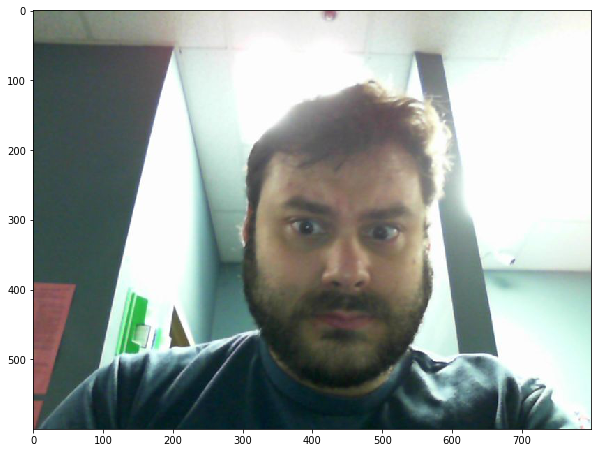

anger: 24.1%
calm: 0.0%
happiness: 75.9%
Dominant emotion: happiness



In [14]:
#Older webcam method testing ** will get replaced when j/s method is implemented
FERModel_Prediction_Old(webcamImageFileData)

In [0]:
#Javascript webcam application (Work in progress)
"""
Next Task:
The goal is to be able to take photos and apply different EmoPy models
to an actively running webcam (recording video and snapping photos in 1 second
intervals to use the convolutional model). I just need to convert the image
format (base64) into one that is compatible with the modeling agent.

Future Tasks:
I will then add in things like the ability to stop the live feed or data saving
to your computer, model training, the ability for the webcam to autodetect when
the face is ready to have emotions accounted for, An update every few seconds
of the last emotion that was classified.
"""

In [0]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

filename='photo.jpg'
quality=0.8
size=(800,600)


#A modified method that takes a photo in base64 binary format when the mouse is clicked
display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
data = eval_js("data")
binary = b64decode(data.split(',')[1])
io.BytesIO(binary)

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();    
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  while True:
    filename = take_photo()
    FERModel_Prediction(ImageToData(filename))  
    print('Saved to {}'.format(filename))
  
    # Show the image which was just taken.
    display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
#Train a time delay convolutional model
#!python3 timedelay_conv_model.py